## Assignment - Week 12
### by Bogdan Popa

The assignment is to preprocess data for scikit-learn. The mushroom dataset foudn in the UCI repository will be used for the project https://archive.ics.uci.edu/ml/datasets/Mushroom. 


In [141]:
import pandas as pd

# Read the data and assign it to the data dataset
data = pd.read_csv('agaricus-lepiota.data', sep=",", header=None)

In [142]:
# Printing the dataset
print(data)

     0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0     p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1     e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2     e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3     p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4     e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g
...  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
8119  e  k  s  n  f  n  a  c  b  y  ...  s  o  o  p  o  o  p  b  c  l
8120  e  x  s  n  f  n  a  c  b  y  ...  s  o  o  p  n  o  p  b  v  l
8121  e  f  s  n  f  n  a  c  b  n  ...  s  o  o  p  o  o  p  b  c  l
8122  p  k  y  n  f  y  f  c  n  b  ...  k  w  w  p  w  o  e  w  v  l
8123  e  x  s  n  f  n  a  c  b  y  ...  s  o  o  p  o  o  p  o  c  l

[8124 rows x 23 columns]


### Adding a header

The data set does not include a header. Information about each data column can be found on the UCI repository.

In [143]:
# Adding headers to each of the 23 columns based on the information found on the UCI repository 
data.columns =["edible/poisonous","cap-shape","cap-surface","cap-color","bruises","odor",
              "gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root",
              "stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring",
              "stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type",
              "spore-print-color","population","habitat"]

In [144]:
# Print the heading of the dataset
data.head()

,edible/poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### "Edible/Poisonous", "Odor", and "Cap-color" dataset

Next, I create a new dataset using only the "target" edible/poisonous column, the "odor" column, and the "cap-color" colulmn.

In [145]:
new_df = data.filter(['edible/poisonous','odor','cap-color'])
new_df.head()

,edible/poisonous,odor,cap-color
0,p,p,n
1,e,a,y
2,e,l,w
3,p,p,w
4,e,n,g


#### Replacing codes with numeric values.

Scikit-learn requires that values be stored as numerics. The values in the dataset will be converted to numeric as follow:

The values for the "Edible/Poisonous" column

| Edible/Poisonous | Code | Numeric Value |
| :- | :- | :- |
| Edible | e | 0 |
| Poisonous | p | 1 |


The values for the "Odor" column

| Odor | Code | Numeric Value |
| :- | :- | :- |
| almond | a | 1 |
| anise | l | 2 |
| creosote | c | 3 |
| fishy | y | 4 |
| foul | f | 5 |
| musty | m | 6 |
| none | n | 0 |
| pungent | p | 7 |
| spicy | s | 8 |

The values for the "cap-color" column

| Cap Color | Code | Numeric Value |
| :- | :- | :- |
| brown | n | 0 |
| buff | b | 1 |
| cinnamon | c | 2 |
| gray | g | 3 |
| green | r | 4 |
| pink | p | 5 |
| purple | u | 6 |
| red | e | 7 |
| white | w | 8 |
| yellow | y | 9 |


In [146]:
# Replacing codes in each columln with the nulmeric values found above.
new_df['edible/poisonous']=new_df['edible/poisonous'].replace({'e':0,'p':1})
new_df['odor']=new_df['odor'].replace({'a':1,'l':2,'c':3,'y':4,'f':5,'m':6,'n':0,'p':7,'s':8})
new_df['cap-color']=new_df['cap-color'].replace({'n':0,'b':1,'c':2,'g':3,'r':4,'p':5,'u':6,'e':7,'w':8,'y':9})

# printing the header to verify
new_df.head()

,edible/poisonous,odor,cap-color
0,1,7,0
1,0,1,9
2,0,2,8
3,1,7,8
4,0,0,3


### Plotting the data

First let's look at the distribution of poisonous and edible mushrooms.

<AxesSubplot:title={'center':'Distribution of Edible(0) and Poisonous(1) Mushrooms'}, ylabel='Edible (0) / Poisonous (1)'>

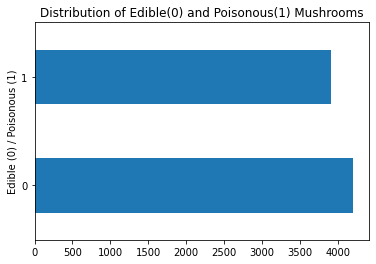

In [147]:
new_df['edible/poisonous'].value_counts().plot(kind='barh',title="Distribution of Edible(0) and Poisonous(1) Mushrooms",ylabel="Edible (0) / Poisonous (1)")

The distribution of poisonous and edible mushrooms is pretty close. There are slightly more edible mushrooms than poisonous ones.

Next, lets look to see if odor can determine which mushrooms are poisonous.

<AxesSubplot:xlabel='odor', ylabel='edible/poisonous'>

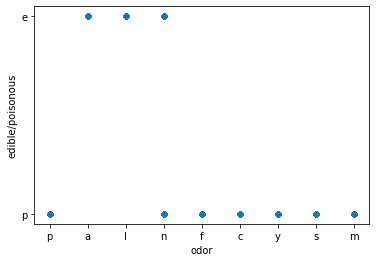

In [148]:
data.plot.scatter(x='odor', y='edible/poisonous')


It looks like any mushrooms that have an almond or anise odor are edible. All other can be  poisonous.


Lastly, let's determine if there's a way to tell if a mushroom is edible just by it's cap color.


<AxesSubplot:xlabel='cap-color', ylabel='edible/poisonous'>

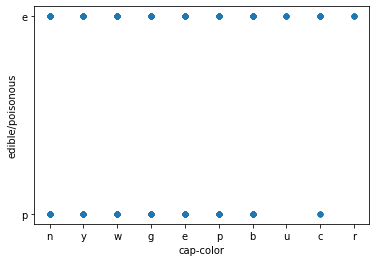

In [149]:
data.plot.scatter(x='cap-color', y='edible/poisonous')

According to the data set any mushroom with a cap color of purple or green is edible. There are no poisonous mushrooms that have a purple or green cap color.